## Problem statement

Predict future sales amount for specific User and Product Code based on last month sales.

## Exploratory analysis

In [2]:
# Import libraries
import pandas as pd
import pandas_profiling
import numpy as np
import copy

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from IPython.display import HTML

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
# Read data
path = '/Users/dangloan/Documents/learning_analytics/project/'
df = pd.read_csv(path + '3_data/black_friday/train.csv')
df_test = pd.read_csv(path + '3_data/black_friday/test.csv')

In [4]:
# Take an overview of train dataset
profile = pandas_profiling.ProfileReport(df,check_correlation = True)
profile.to_file(outputfile="output.html")

In [5]:
HTML(filename='/Users/dangloan/Documents/learning_analytics/' \
                 'project/code/project_1/output.html')

Number of variables,12
Number of observations,550068
Total Missing (%),8.4%
Total size in memory,50.4 MiB
Average record size in memory,96.0 B
Numeric,6
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


Now take a look at test data set to see if distribution is similar to train data

In [103]:
# Get an overview of test dataset
profile = pandas_profiling.ProfileReport(df_test,check_correlation = True)
profile

Number of variables,11
Number of observations,233599
Total Missing (%),9.1%
Total size in memory,19.6 MiB
Average record size in memory,88.0 B
Numeric,5
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,0


For some reason, pandas_profiling doesn't show correlation between features. Let's generate correlation heatmap for train and test data sets.

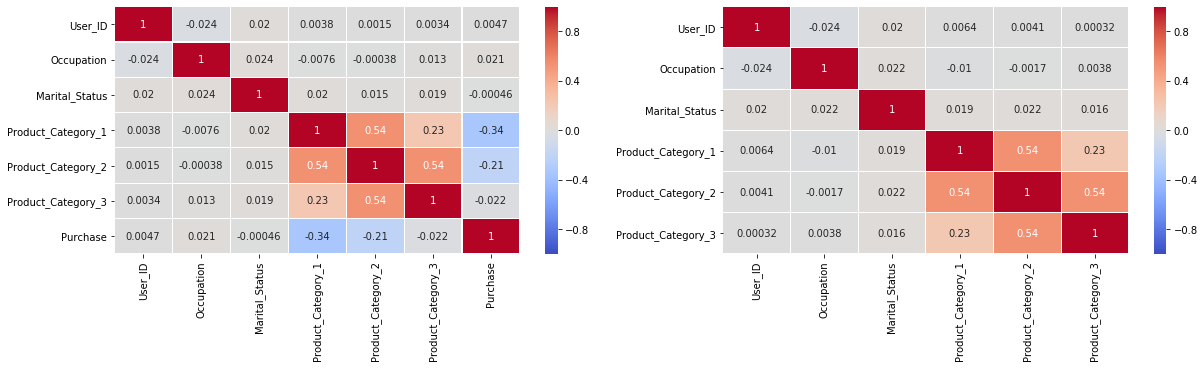

In [13]:
fig = plt.figure(figsize=(20,10))

fig.add_subplot(221)   #top left
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           linecolor='white',
           linewidths='0.1')

fig.add_subplot(222)   #top right
sns.heatmap(df_test.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True,
           linecolor='white',
           linewidths='0.1')

plt.show()

#### Explore purchase amount by Occupation field.
There are some differences in purchase average (mean) between Occupations.

In [9]:
c = df.groupby('Occupation')['Purchase'].agg(['count','mean']).reset_index()\
        .sort_values('mean', ascending=False)
c.columns = ['Occupation','count','mean']
c

,Occupation,count,mean
17,17,40043,9821.478236
12,12,31179,9796.640239
15,15,12165,9778.891163
8,8,1546,9532.592497
14,14,27309,9500.702772
7,7,59133,9425.728223
16,16,25371,9394.464349
5,5,12177,9333.149298
13,13,7728,9306.351061
6,6,20355,9256.535691


Text(0.5, 1.0, 'Purchase count and mean by Occupation codes')

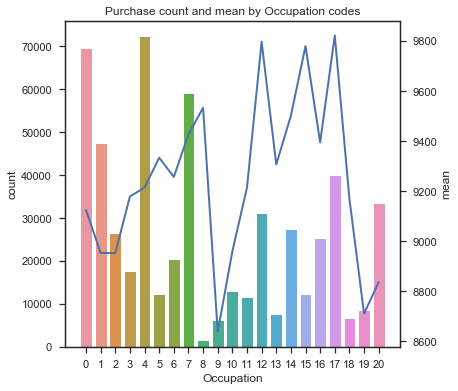

In [11]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(10,10))
# fig, ax = plt.subplots(ncols=2)

sns.set(style="ticks", rc={"lines.linewidth": 2})
fig, ax1 = plt.subplots(figsize=(6,6))
ax2 = ax1.twinx()

sns.barplot(x='Occupation', y='count', data=c, ax = ax1)
sns.lineplot(x='Occupation',y='mean', data=c, ax=ax2)
plt.title('Purchase count and mean by Occupation codes')


I observe that Occupation code 8 and 18 have high average purchase amount (purchase mean) with very low number of purchases (purchase count), and Occopation code 9 and 19 have the very low average purchase amount and low number of purchases. These extreme statistics seems to be abnormalies but they wouldn't supportive to model learning. They can be explained by just the small sample sizes (low purchase count).

Purchase statistics for other Occupations are fine. Therefore, it can be said that there are differences in Purchase amount (mean) between different Occupations. 

This gives me an idea about grouping occupations by purchase mean & purchase count. I'm not quite sure if it would help increase prediction power. 21 occupations is not a very big number for one-hot labeling. Therefore, lets just leave this field as is and proceed one-hot at modeling stage.

#### Explore Age variable
Now let's explore distribution of purchase amount by Age groups.

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


NameError: name 'ax' is not defined

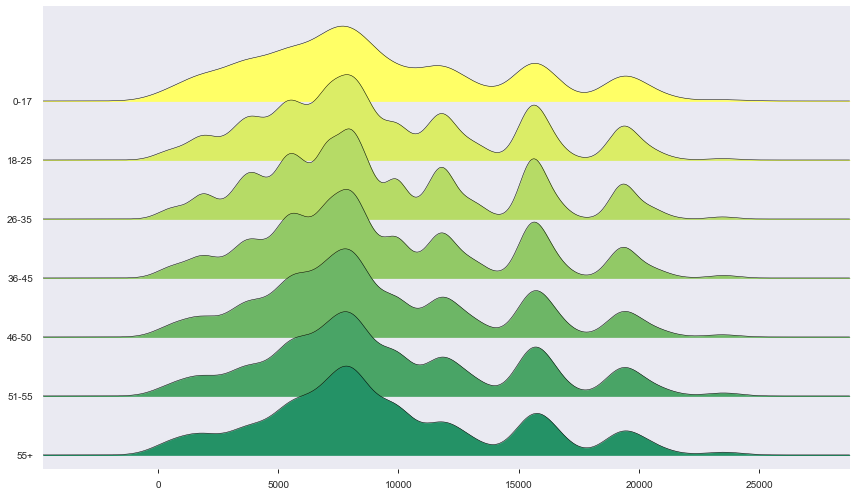

In [6]:
import joypy
from matplotlib import cm
%matplotlib inline

fig, ax1 = plt.subplots(figsize=(12,7))
ax2 = ax1.twinx()

joypy.joyplot(df[df.Gender == 'M'], by='Age', column='Purchase',ax=ax1,
              linewidth=0.5,
             colormap=cm.summer_r)
# joypy.joyplot(df[df.Gender == 'F'], by='Age', column='Purchase',ax=ax2,
#               linewidth=0.5,
#              color='#69b3a2')

ax[0].legend(['Male', 'Female'], facecolor='w')
plt.show()
plt.title("Distribution of purchase amount by customer age")

There is a very slight difference in purchase amount between age groups.

I am going to encode categorical columns using One Hot: Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status. For high cadinarity columns (Produc Cat), I am looking for a better solution. I may need to look at purchase statistics to group them.
In the correlation report, there are some correlations between Product Cats and Purchase. I'm going to look deeper into Product Categories.

#### Explore Product dimension

In [12]:
a = df.groupby('Product_Category_1')['Purchase'].agg(['count','mean']).reset_index()\
        .sort_values('mean', ascending=False)
a.columns = ['Product_Category_1','count','mean']
a

,Product_Category_1,count,mean
9,10,5125,19675.570927
6,7,3721,16365.689600
5,6,20466,15838.478550
8,9,410,15537.375610
14,15,6290,14780.451828
15,16,9828,14766.037037
0,1,140378,13606.218596
13,14,1523,13141.625739
1,2,23864,11251.935384
16,17,578,10170.759516


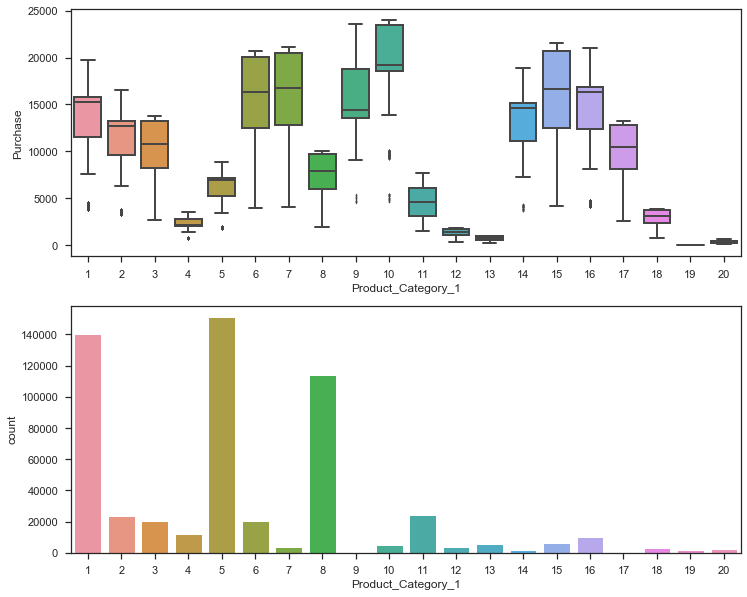

In [13]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(211)
sns.boxplot(x="Product_Category_1", y="Purchase", data=df, fliersize='0.5')

ax2 = fig.add_subplot(212)
sns.barplot(a['Product_Category_1'],a['count'])


Clearly, purchase amount distribution varies ammong Product_Categories_1. Cat 1, 5, 8 with large number of purchase shows a clear different purchase amount distribution. Cat 1 has higher purchase median among the three.

As product dimension shows some interesting pattern, I continue analyzing Product_ID, which is more granular than Product Categories.

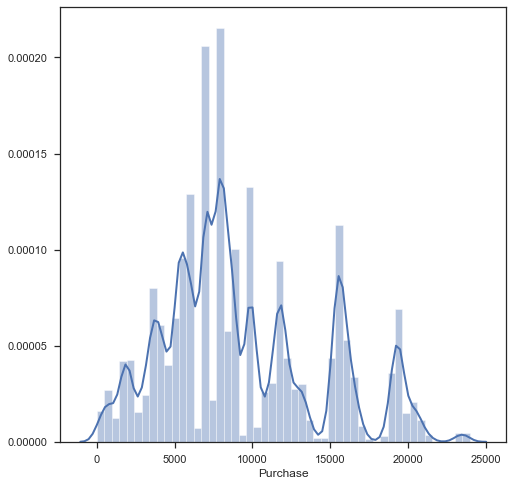

In [82]:
# Purchase amount (each transaction) distribution
plt.figure(figsize=(8,8))
sns.distplot(df['Purchase'])
plt.show()

In [85]:
a = df.groupby('Purchase')['Product_ID'].nunique().reset_index()
a.columns =['Purchase_amount','Number_of_transactions']

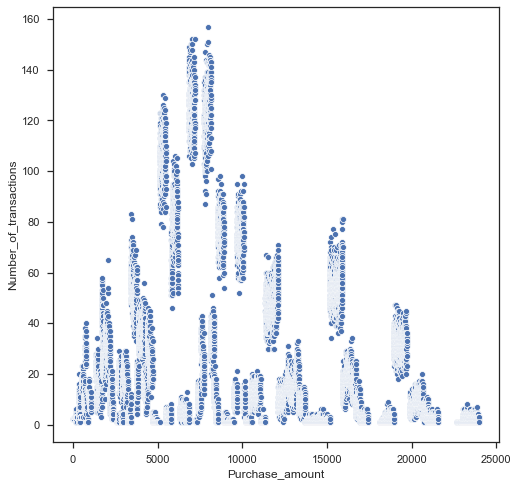

In [88]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Purchase_amount', y='Number_of_transactions', data=a)

In [75]:
a = df.groupby('Product_ID')['Purchase'].agg({'count','mean'}).reset_index()
a.columns =['Product_ID','Prod_count','Prod_mean']
# b = a[a['Prod_count'] <= 200]
b= copy.deepcopy(a)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
c= scaler.fit_transform(b[['Prod_count','Prod_mean']])

kmeans = KMeans(n_clusters=5)  
kmeans.fit(c)

c_df = pd.DataFrame(c)

c_df['cluster'] = kmeans.labels_
c_df = pd.concat([c_df.reset_index(drop=True), 
                  b[['Product_ID']].reset_index(drop=True)],
                 axis=1,ignore_index= True)

c_df.columns = ['Prod_count','Prod_mean','cluster','Product_ID']

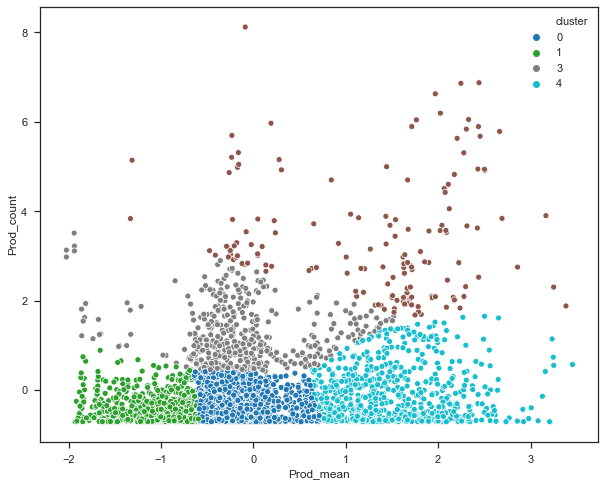

In [76]:
plt.figure(figsize=(10,8))
sns.scatterplot(c_df['Prod_mean'], c_df['Prod_count'], hue=c_df['cluster'],palette='tab10')

Each Product_ID is segmented based on its Purchase statistics: Purchase amount and Number of Purchase. There are 5 typical groups of products:
- Segment 1: Small purchase amount, small number of purchases
- Segment 2: Medium purchase amount, small number of purchases
- Segment 3: Large purchase amount, small number of purchases
- Segment 4: Medium purchase amount, medium number of purchases
- Segment 5: Large purchase amount, large number of purchases

Beside Product Category, Product segments as above could be useful in prediction model.

It seems Product dimension would provide certain prediction value because there are some different in purchase volume and amount for different product groups. I'm going to see deeper into Product_ID by looking at the distribution of the avarage and std values of the purchase.

#### More research about Product_ID

In [44]:
# Reducing boundaries to decrease RMSE
cutoff_purchase = np.percentile(df['Purchase'], 99.9)  # 99.9 percentile
a = copy.deepcopy(df)
a.ix[a['Purchase'] > cutoff_purchase, 'Purchase'] = cutoff_purchase
b = a.groupby('Product_ID')['Purchase'].agg({'mean','std'}).reset_index()
b.head()

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,Product_ID,std,mean
0,P00000142,2305.175261,11143.642361
1,P00000242,3170.603417,10551.851064
2,P00000342,1824.925693,5313.422131
3,P00000442,1664.088125,4795.358696
4,P00000542,1724.458154,5417.530201


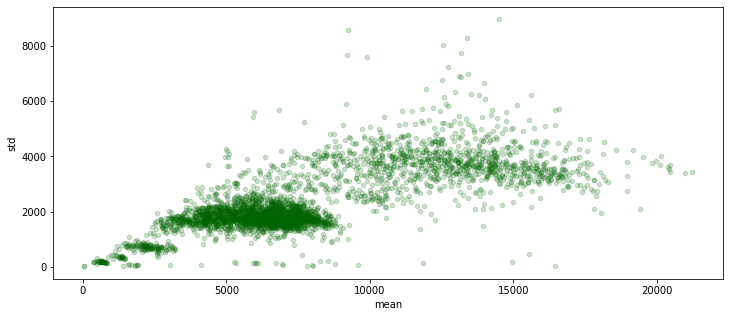

In [8]:
%matplotlib inline
plt.figure(figsize=(12,5))
# sns.scatterplot(b['mean'],b['std'], s=20, alpha=0.3, color='darkgreen')
sns.regplot(b['mean'],b['std'], fit_reg=False, scatter_kws={"color":"darkgreen","alpha":0.2,"s":20} )
# sns.plt.show()


<Figure size 1152x576 with 0 Axes>

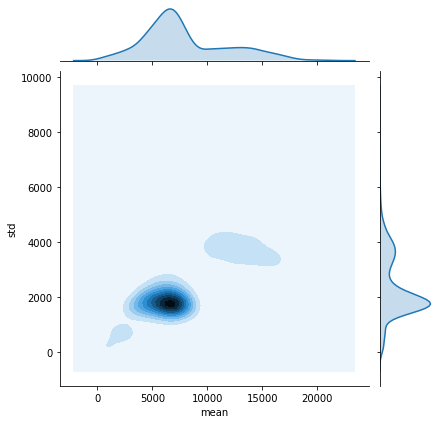

In [5]:
%matplotlib inline
plt.figure(figsize=(16,8))
sns.jointplot(b['mean'],b['std'], kind='kde')
# sns.jointplot(x1, x2, kind="kde", height=7, space=0)

There are two distinct groups of Product. The first group includes dominant number of products. These purchases have an medium purchase amount and medium variance. The second group includes smaller number of products. These purchases have large average purchase amount and high purchase amount variance. The distinction in mean and std values between Product_ID can be used in predictive model (label statistics features). However, I would try this feature engineering method but I'm aware that this may cause label information leaking which may lead to overfitting.

#### Explore User_ID data

In [18]:
e = df.groupby('Purchase')['User_ID'].nunique().reset_index()
e.columns =['Purchase_point','count']

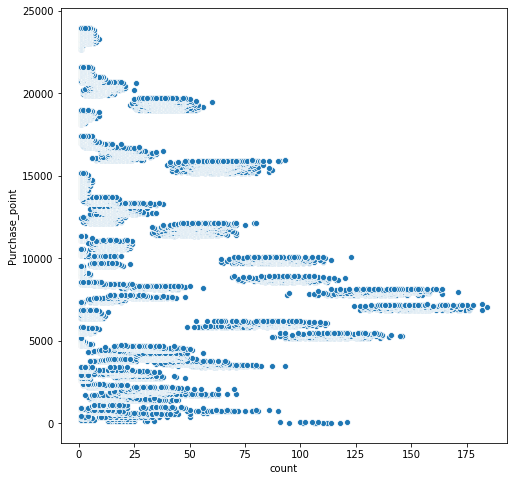

In [19]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.scatterplot(y='Purchase_point', x='count', data=e)

In [77]:
e = df.groupby('User_ID')['Purchase'].agg({'count','mean'}).reset_index()
e.columns =['User_ID','U_count','U_mean']
# b = a[a['Prod_count'] <= 200]
f= copy.deepcopy(e)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
g= scaler.fit_transform(f[['U_count','U_mean']])

kmeans = KMeans(n_clusters=6)  
kmeans.fit(g)

g_df = pd.DataFrame(g)

g_df['cluster'] = kmeans.labels_
g_df = pd.concat([g_df.reset_index(drop=True), 
                  f[['User_ID']].reset_index(drop=True)],
                 axis=1,ignore_index= True)

g_df.columns = ['U_count','U_mean','cluster','U_ID']

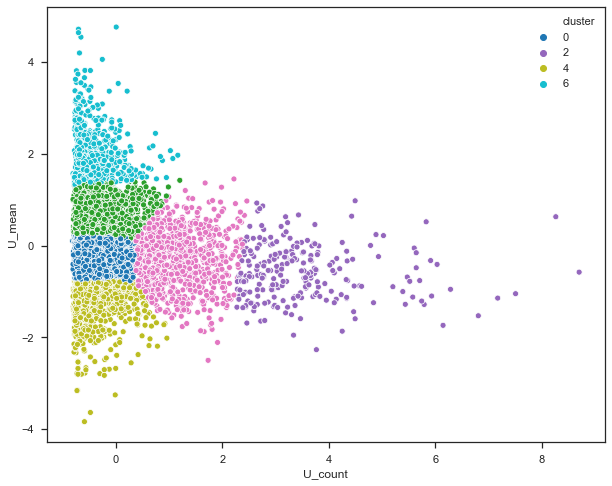

In [78]:
plt.figure(figsize=(10,8))
sns.scatterplot(g_df['U_count'], g_df['U_mean'], hue=g_df['cluster'],palette='tab10')

Similar to Product_ID clustering, there are also meaningful segmented User groups based on their purchase statistics (count and mean). This will also be used in predictive model.